# Music Synthesis with FS

In this assignment, we implement Fourier Synthesis to generate music. <br \>
Initially we use python libraries to generate basic waveforms like sine waves, saw tooth waves, triangular waves and even random waveforms. <br \>
Then using just the durations and frequencies given in the supporting document, we generate songs using sine waves.
<br \>


In [1]:
import scipy.io.wavfile as sciw
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [2]:
def make_tone(freq, length, sr):
    return np.int16((np.sin(np.linspace(0, 2*np.pi*freq*length, sr*length))*(2**15-1)))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


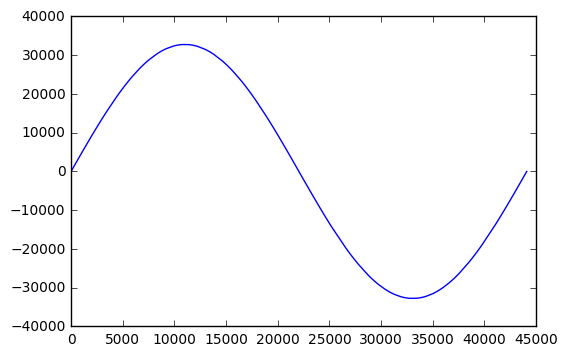

In [3]:
plt.plot(make_tone(1.0, 1.0, 44100))
plt.show()

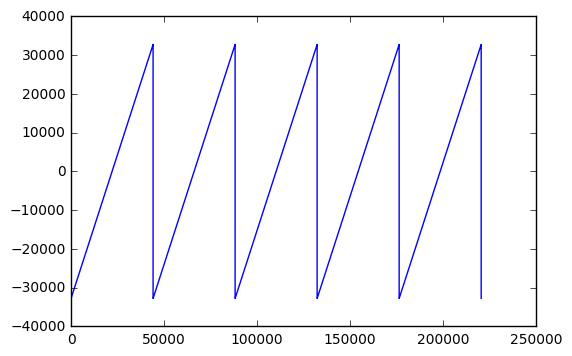

In [4]:
def make_sawtooth(freq, length, sr):
    return np.int16(signal.sawtooth(2*np.pi*np.linspace(0, length, length*sr), 1)*(2**15-1))

plt.plot(make_sawtooth(1, 5, 44100))
plt.show()

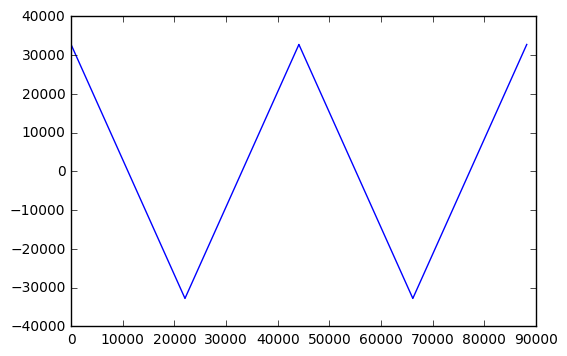

In [5]:
def make_triangle(freq, length, sr):
    return np.int16((np.absolute(signal.sawtooth(2*np.pi*np.linspace(0, 
        length, length*sr), 1))*2.0-1.0)*(2**15-1))

plt.plot(make_triangle(1, 2, 44100))
plt.show()

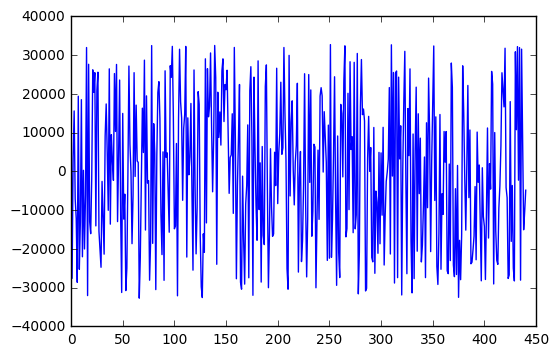

In [6]:
def make_random(freq, length, sr):
    return np.int16((np.tile(np.random.random(int(sr*1.0/freq)), freq*length)*2.0-1.0)*(2**15-1))

plt.plot(make_random(100, 0.01, 44100))
plt.show()

In [9]:
def ADSR(attack_level, sustain_level, attack_time, decay_time, sustain_time, release_time, tone):
    y = np.empty(0)
    
    t_attack = np.linspace(0, attack_time, int(44100*attack_time))
    y_attack = attack_level*t_attack/attack_time
    y = np.append(y, y_attack)
    
    t_decay = np.linspace(0, decay_time, int(44100*decay_time))
    y_decay = (sustain_level - attack_level)*(t_decay)/decay_time + attack_level
    y = np.append(y, y_decay)
    
    t_sustain = np.linspace(0, sustain_time, int(44100*sustain_time))
    y_sustain = sustain_level*np.ones(len(t_sustain))
    y = np.append(y, y_sustain)
    
    t_release = np.linspace(0, release_time, int(44100*release_time))
    y_release = -sustain_level*t_release/release_time + sustain_level
    y = np.append(y, y_release)
    
    return np.int16(tone*y)

In [27]:
def readText(nameOfFile):
    with open(nameOfFile, 'r') as myfile:
        data=myfile.read().replace(';', ',').replace('(', '').replace(')', '').replace('\n', '')
    data = np.fromstring(data, sep=',', dtype = float)
    frequencies = data[0::2]
    durations = data[1::2]
    song = np.column_stack((frequencies, durations))
    song[:,1] /= 1000
    return song

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


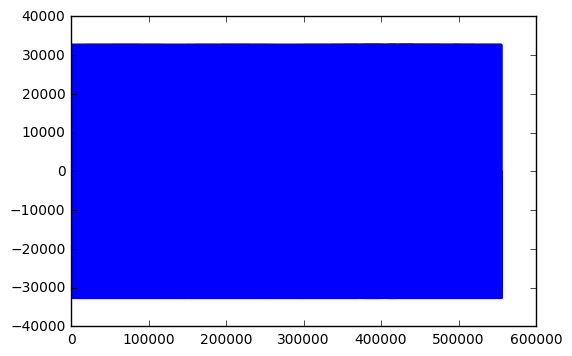

In [31]:
sample_rate = 44100
songA = readText('songA.txt')
audioA = np.empty(0)
for frequency, duration in songA:
    audioA = np.append(audioA, make_tone(frequency, duration, sample_rate))
sciw.write("audioA.wav", 44100, np.int16(audioA))
plt.plot(audioA)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


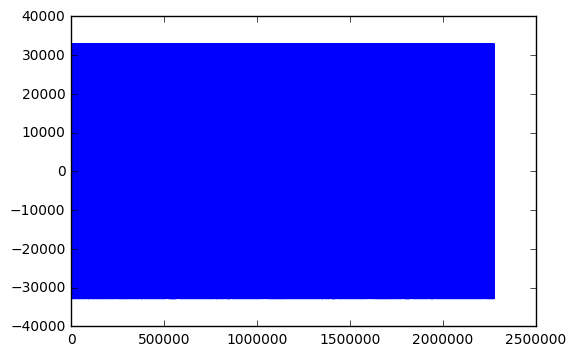

In [32]:
sample_rate = 44100
songB = readText('songB.txt')
audioB = np.empty(0)
for frequency, duration in songB:
    audioB = np.append(audioB, make_tone(frequency, duration, sample_rate))
sciw.write("audioB.wav", 44100, np.int16(audioB))
plt.plot(audioB)
plt.show()

### Waveforms don't look so interesting? Well, we can improve how they look and how they sound.